# Classification of Mushrooms into Edible versus Poisonous

First, I will read in the data from the UCI website.

In [2]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
column_names=['edibility','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing',
              'gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
              'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type',
              'spore-print-color','population','habitat']
shroom = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',names=column_names)

In [4]:
shroom.head(5)

,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
shroom.shape

(8124, 23)

Information copied from the UCI website.

Attribute Information: (classes: edible=e, poisonous=p)

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

One of the interesting aspects of this dataset is that all of the features are categorical.  In order to run this data through a machine learning model, I will need to implement one-hot-encoding on these features.  This can be done easily in pandas.

In [6]:
shroom2 = pd.get_dummies(shroom)
shroom2.shape

(8124, 119)

In [7]:
shroom2.head()

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


One-hot-encoding converted the original shroom dataframe which had 23 columns into a new dataframe which I call shroom2 into 119 columns.  The first 2 columns are edibility_e and edibility_p, which stands for edible and poisonous.  I only need one of these columns to be my target variable, so we will use the notation that 1 stands for edible and 0 stands for poisonous, which corresponds to the edibility_e column.

In [8]:
shroom2.drop('edibility_p',axis=1,inplace=True)
shroom2.head()

,edibility_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [9]:
shroom2.corr()['edibility_e'].sort_values(ascending=False)[:10]

edibility_e                   1.000000
odor_n                        0.785557
ring-type_p                   0.540469
gill-size_b                   0.540024
bruises_t                     0.501530
stalk-surface-above-ring_s    0.491314
stalk-surface-below-ring_s    0.425444
spore-print-color_n           0.416645
spore-print-color_k           0.396832
gill-spacing_w                0.348387
Name: edibility_e, dtype: float64

In [10]:
shroom2.corr()['edibility_e'].sort_values(ascending=False)[-10:]

population_v                 -0.443722
ring-type_l                  -0.451619
spore-print-color_h          -0.490229
bruises_f                    -0.501530
gill-color_b                 -0.538808
gill-size_n                  -0.540024
stalk-surface-below-ring_k   -0.573524
stalk-surface-above-ring_k   -0.587658
odor_f                       -0.623842
veil-type_p                        NaN
Name: edibility_e, dtype: float64

This is really interesting, because examining the top 10 correlations against edibility, the oder_n feature has a fairly strong correlation with edibility_e.  The oder_n feature stands for no odor.

I'm now going to build a heatmap of the correlations.

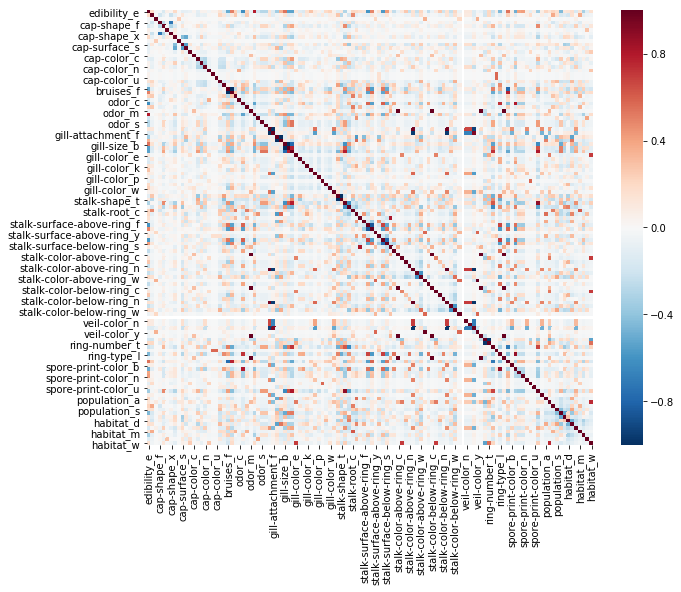

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(shroom2.corr(),cmap='RdBu_r')

Now I'm going to build a heatmap which takes only the features that are correlated with edibility having correlations > .4 or < -.4.

In [12]:
mask1 = shroom2.corr()['edibility_e'] > .4
mask2 = shroom2.corr()['edibility_e'] < -.4

In [13]:
feat_list1 = []
for idx, value in mask1.iteritems():
    if value == True:
        feat_list1.append(idx)

feat_list1

['edibility_e',
 'bruises_t',
 'odor_n',
 'gill-size_b',
 'stalk-surface-above-ring_s',
 'stalk-surface-below-ring_s',
 'ring-type_p',
 'spore-print-color_n']

In [14]:
feat_list2 = []
for idx, value in mask2.iteritems():
    if value == True:
        feat_list2.append(idx)

feat_list2

['bruises_f',
 'odor_f',
 'gill-size_n',
 'gill-color_b',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_k',
 'ring-type_l',
 'spore-print-color_h',
 'population_v']

In [15]:
feat_list = []
feat_list = feat_list1 + feat_list2
feat_list

['edibility_e',
 'bruises_t',
 'odor_n',
 'gill-size_b',
 'stalk-surface-above-ring_s',
 'stalk-surface-below-ring_s',
 'ring-type_p',
 'spore-print-color_n',
 'bruises_f',
 'odor_f',
 'gill-size_n',
 'gill-color_b',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_k',
 'ring-type_l',
 'spore-print-color_h',
 'population_v']

Now I have a list of the most important features that I can use to generate the heatmap.

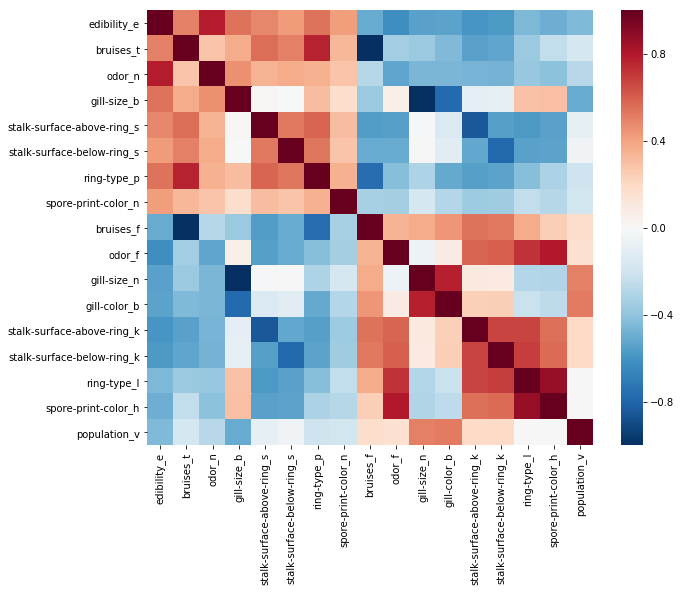

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(shroom2[feat_list].corr(),cmap='RdBu_r')
plt.savefig('mushroom_heatmap.png',dpi=200)

Let's try to create our first classification model.  We will start with Logisitic Regression.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import learning_curve

In [18]:
y = shroom2['edibility_e']
X = shroom2.drop('edibility_e',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=1)

In [19]:
logreg = LogisticRegression().fit(X_train,y_train)
    
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 1.000
Test set score: 0.999


In [20]:
y_train_predict = logreg.predict(X_train)
y_test_predict = logreg.predict(X_test)

In [21]:
metrics.confusion_matrix(y_train,y_train_predict)

array([[2713,    1],
       [   0, 2972]])

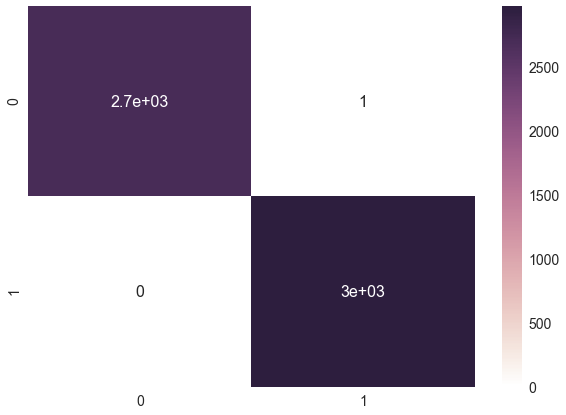

In [22]:
train_matrix = metrics.confusion_matrix(y_train,y_train_predict)
df_cm = pd.DataFrame(train_matrix, range(2),
                  range(2))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap=cmap)# font size

In [23]:
metrics.confusion_matrix(y_test,y_test_predict)

array([[1199,    3],
       [   0, 1236]])

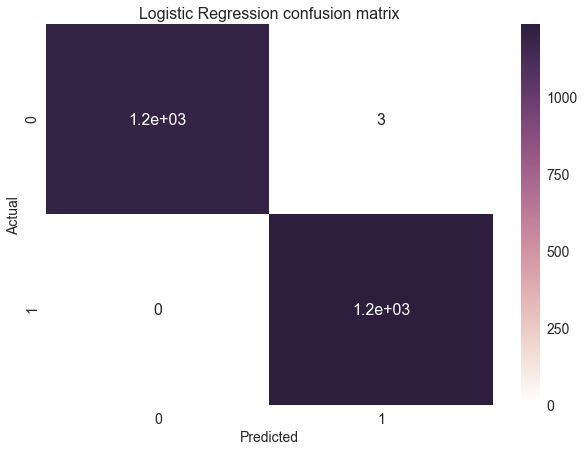

In [24]:
test_matrix = metrics.confusion_matrix(y_test,y_test_predict)
df_cm = pd.DataFrame(test_matrix, range(2),
                  range(2))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap=cmap)# font size
plt.xlabel('Predicted',fontsize=14)
plt.ylabel('Actual',fontsize=14)
plt.title('Logistic Regression confusion matrix',fontsize=16)
plt.savefig('Logistic_regression_confusion.png',dpi=200)

In [25]:
print(metrics.classification_report(y_test,y_test_predict,digits=3))

             precision    recall  f1-score   support

          0      1.000     0.998     0.999      1202
          1      0.998     1.000     0.999      1236

avg / total      0.999     0.999     0.999      2438



In [26]:
logreg_auc = metrics.roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
print("The logistic regression AUC is: {:.3f}".format(logreg_auc))

The logistic regression AUC is: 1.000


In [27]:
print("Test set precision score: {:.3f}".format(metrics.precision_score(y_test,y_test_predict)))
print("Test set recall score: {:.3f}".format(metrics.recall_score(y_test,y_test_predict)))
print("Test set F-1 score: {:.3f}".format(metrics.f1_score(y_test,y_test_predict)))

Test set precision score: 0.998
Test set recall score: 1.000
Test set F-1 score: 0.999


In [28]:
train_sizes = np.linspace(.01,1,11)
train_sizes, logreg_train_scores, logreg_test_scores = learning_curve(LogisticRegression(C=1), X_train, y_train, cv=5, train_sizes=train_sizes, scoring='accuracy')

In [29]:
logreg_train_cv_accuracy = np.mean(logreg_train_scores,axis=1)
logreg_test_cv_accuracy = np.mean(logreg_test_scores,axis=1)

Text(0.5,1,'Learning curve for Logistic Regression model')

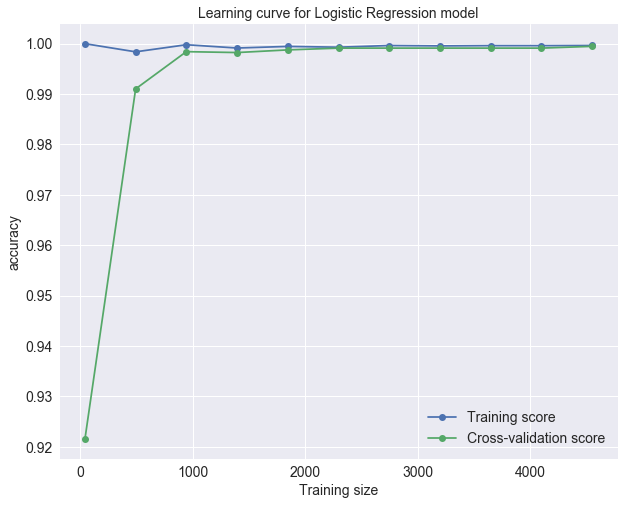

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(train_sizes,logreg_train_cv_accuracy,'-o',label='Training score')
ax.plot(train_sizes,logreg_test_cv_accuracy,'-o',label='Cross-validation score')
#ax.set_ylim(.8,1)
ax.legend(fontsize=14,loc=4)
ax.set_xlabel('Training size', fontsize=14)
ax.set_ylabel('accuracy', fontsize=14)
ax.set_title('Learning curve for Logistic Regression model', fontsize=14)

In [31]:
print(shroom2.columns)

Index(['edibility_e', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g', 'cap-surface_s',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=118)


In [32]:
lr_coef = logreg.coef_
type(lr_coef)

numpy.ndarray

In [26]:
#fig, ax = plt.subplots(figsize=(10,8))
#ax.plot(logreg.coef_.T,'o')
#ax.set_xticks(range(X.shape[1]))
#ax.set_xticklabels(X.columns)

In [33]:
# which features have the most positive and most negative coefficient values?
coef_S = pd.Series(logreg.coef_.T[:,0],index=X.columns)
coef_S.sort_values(ascending=True)
coef_S.to_csv('logreg_coef.csv')

In [212]:
#importing a library available for download on github (https://github.com/amueller/mglearn)
#import mglearn

#mglearn.plots.plot_2d_separator(logreg, X.loc[:,['odor_n','spore-print-color_r']].values, fill=False, eps=0.5, ax=ax, alpha=.7)
#mglearn.discrete_scatter(X.loc[:,'odor_n'],X.loc[:,'spore-print-color_r'],y,ax=ax)
#ax.legend()

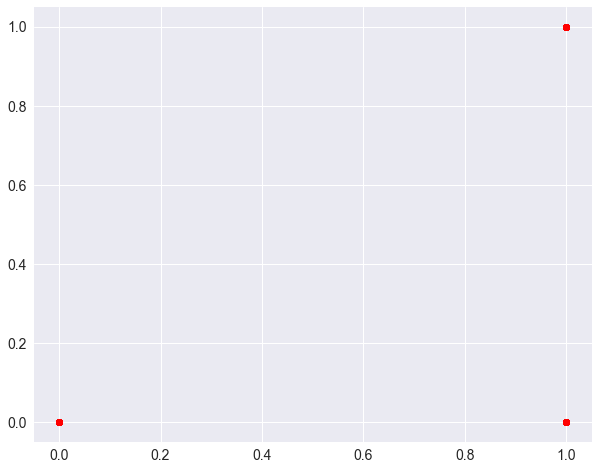

In [34]:
#here I was starting to create a decision boundary plot, but I'm realizing that doesn't make sense for binary data
X_poisonous = X[y==0]
X_edible = X[y==1]

fig,ax = plt.subplots(figsize=(10,8))
ax.plot(X_edible.loc[:,'odor_n'],X_edible.loc[:,'spore-print-color_r'],'bo')
ax.plot(X_poisonous.loc[:,'odor_n'],X_poisonous.loc[:,'spore-print-color_r'],'ro')

In [35]:
# Try logistic regression with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1').fit(X_train,y_train)
    
print("Training set score: {:.3f}".format(logreg_l1.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg_l1.score(X_test,y_test)))

Training set score: 0.999
Test set score: 0.998


In [36]:
y_test_predict = logreg_l1.predict(X_test)

In [37]:
print(metrics.classification_report(y_test,y_test_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1202
          1       1.00      1.00      1.00      1236

avg / total       1.00      1.00      1.00      2438



In [41]:
logreg_l1_auc = metrics.roc_auc_score(y_test,logreg_l1.predict_proba(X_test)[:,1])
print("The logistic regression AUC with L1 regularization is: {:.3f}".format(logreg_l1_auc))

The logistic regression AUC with L1 regularization is: 1.000


In [161]:
%recall 156

In [42]:
print("Test set precision score: {:.3f}".format(metrics.precision_score(y_test,y_test_predict)))
print("Test set recall score: {:.3f}".format(metrics.recall_score(y_test,y_test_predict)))
print("Test set F-1 score: {:.3f}".format(metrics.f1_score(y_test,y_test_predict)))

Test set precision score: 0.996
Test set recall score: 1.000
Test set F-1 score: 0.998


In [135]:
logreg_l1.coef_

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.51402461,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  -0.36982066,   0.        ,
          0.        ,   0.        ,   8.83820862,   0.        ,
         -4.62993809,   8.80037391,   0.        ,   8.79066248,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  -0.85000798,   0.        ,   0.25526904,
         -4.36203269,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         -0.54183234,   0.        ,   0.        ,   0.        ,
          0.        ,  -2.63159059,   0.        ,   0.        ,
          0.2786711 ,   0.        ,   0.

In [136]:
# which features have the most positive and most negative coefficient values?
coef2_S = pd.Series(logreg_l1.coef_.T[:,0],index=X.columns)
mask = coef2_S != 0
coef2_S_select = coef2_S[mask]
coef2_S_select

cap-surface_f                  0.514025
cap-color_w                   -0.369821
odor_a                         8.838209
odor_f                        -4.629938
odor_l                         8.800374
odor_n                         8.790662
gill-spacing_c                -0.850008
gill-size_b                    0.255269
gill-size_n                   -4.362033
stalk-root_b                  -0.541832
stalk-surface-above-ring_k    -2.631591
stalk-surface-below-ring_f     0.278671
stalk-surface-below-ring_y    -2.773674
stalk-color-below-ring_y      -0.415140
spore-print-color_r          -11.423799
spore-print-color_w           -1.033498
population_c                  -2.304604
population_y                   0.331638
dtype: float64

Now I want to create a plot of logistic regression scores versus C.

In [37]:
C_list=[.001,.01,.1,1,10,100]
scores = []
for C in C_list:
    logreg_2 = LogisticRegression(C=C).fit(X_train,y_train)
    train_score = logreg_2.score(X_train,y_train)
    test_score = logreg_2.score(X_test,y_test)
    scores.append((train_score,test_score))

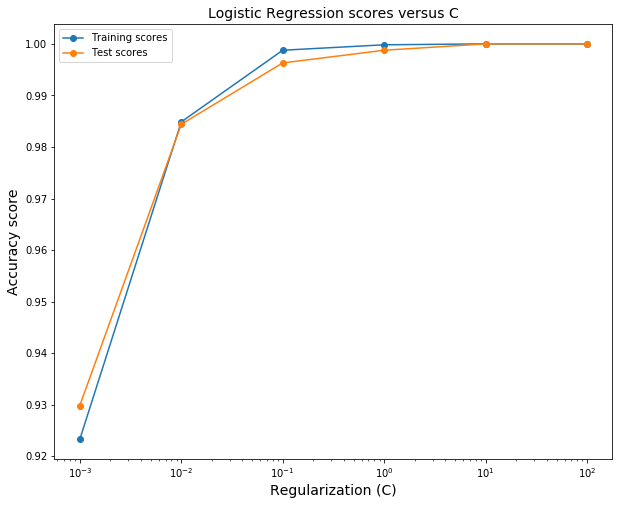

In [51]:
train_score_list, test_score_list = zip(*scores)
plt.figure(figsize=(10,8))
plt.semilogx(C_list,train_score_list,'-o',label='Training scores')
plt.semilogx(C_list,test_score_list,'-o',label='Test scores')
plt.xlabel('Regularization (C)',fontsize=14)
plt.ylabel('Accuracy score', fontsize=14)
plt.title('Logistic Regression scores versus C', fontsize=14)
plt.legend()

Now I'd like to examine how well KNN does at predicting mushroom edibility.

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

print("Training set score: {:.3f}".format(knn.score(X_train,y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test,y_test)))

Training set score: 1.000
Test set score: 1.000


In [58]:
y_test_predict = knn.predict(X_test)

In [168]:
%recall 156

In [60]:
print("Test set precision score: {:.3f}".format(metrics.precision_score(y_test,y_test_predict)))
print("Test set recall score: {:.3f}".format(metrics.recall_score(y_test,y_test_predict)))
print("Test set F-1 score: {:.3f}".format(metrics.f1_score(y_test,y_test_predict)))

Test set precision score: 1.000
Test set recall score: 1.000
Test set F-1 score: 1.000


In [62]:
metrics.confusion_matrix(y_test,y_test_predict)

array([[1202,    0],
       [   0, 1236]])

Wow!  K Nearest Neighbors also does a really good job at predicting mushroom edibility!

How about Decision Trees?

In [92]:
tree = DecisionTreeClassifier().fit(X_train,y_train)

print("Training set score: {:.3f}".format(tree.score(X_train,y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test,y_test)))

Training set score: 1.000
Test set score: 1.000


In [93]:
y_test_predict = tree.predict(X_test)

In [171]:
%recall 156

In [94]:
print("Test set precision score: {:.3f}".format(metrics.precision_score(y_test,y_test_predict)))
print("Test set recall score: {:.3f}".format(metrics.recall_score(y_test,y_test_predict)))
print("Test set F-1 score: {:.3f}".format(metrics.f1_score(y_test,y_test_predict)))

Test set precision score: 1.000
Test set recall score: 1.000
Test set F-1 score: 1.000


Decision Trees also get perfect accuracy!  Which features are most important?

In [95]:
tree_feat_S = pd.Series(tree.feature_importances_,index=X.columns)
mask = tree_feat_S > 0.001
tree_feat_S_select = tree_feat_S[mask]
tree_feat_S_select

bruises_t                     0.024070
odor_n                        0.627391
gill-spacing_w                0.027991
stalk-root_c                  0.170885
stalk-surface-below-ring_y    0.091794
ring-type_e                   0.005559
spore-print-color_r           0.033148
population_c                  0.017751
dtype: float64

Text(0.5,1,'Decision Tree model feature importances')

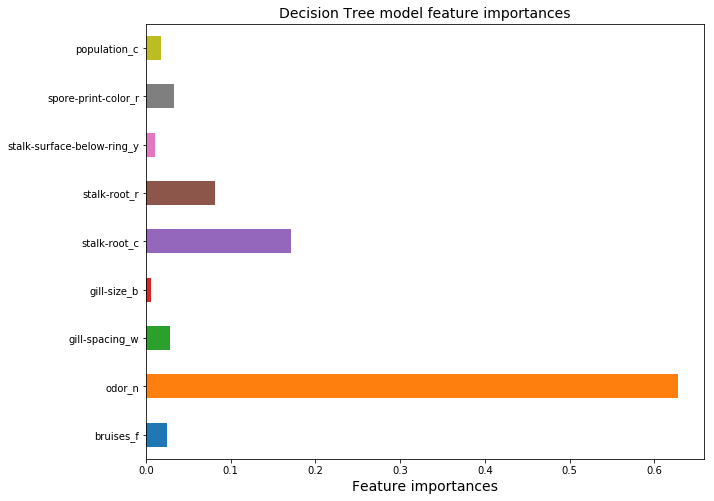

In [70]:
fig, ax = plt.subplots(figsize=(10,8))
tree_feat_S_select.plot(kind='barh')
ax.set_xlabel('Feature importances',fontsize=14)
ax.set_title('Decision Tree model feature importances',fontsize=14)

A couple more things to try:
* create a ROC curve for the 4 models you have tried so far
* see if you can create an animated plot which shows oder_n versus edibility

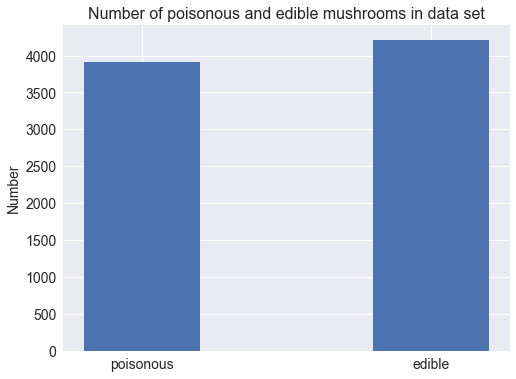

In [159]:
# I'm going to make a quick bar plot which shows the distribution of poisonous and non-poisonous mushrooms
x=[0,1]
counts = y.value_counts()
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(counts.index,counts.values,width=.4)
ax.set_xticks(x)
ax.set_xticklabels(['poisonous','edible'],fontsize=14)
ax.set_title('Number of poisonous and edible mushrooms in data set',fontsize=16)
ax.set_ylabel('Number',fontsize=14)
fig.savefig('Mushroom_bar_plot.png',dpi=200)
#y.values

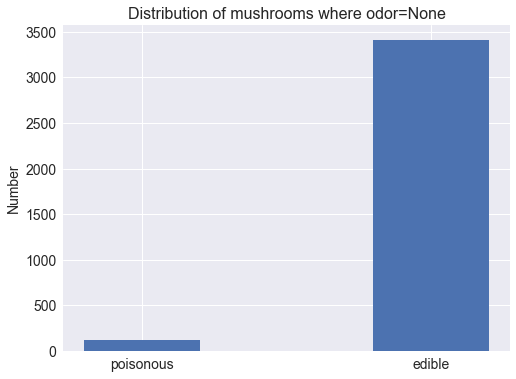

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
mask_odor_n = shroom2['odor_n']==1
num_odor_n = sum(mask_odor_n)
num_edible = sum(shroom2.loc[mask_odor_n,'edibility_e'])
num_poisonous = num_odor_n - num_edible
ax.bar([0,1],[num_poisonous,num_edible],width=0.4)
ax.set_xticks([0,1])
ax.set_xticklabels(['poisonous','edible'],fontsize=14)
ax.set_title('Distribution of mushrooms where odor=None',fontsize=16)
ax.set_ylabel('Number',fontsize=14)
fig.savefig('Mushroom_bar_plot_odor_n.png',dpi=200)

In [50]:
num_edible/num_odor_n

0.9659863945578231

In [51]:
1-_

0.03401360544217691

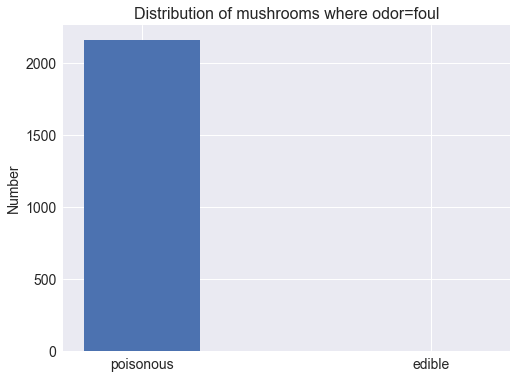

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
mask_odor_f = shroom2['odor_f']==1
num_odor_f = sum(mask_odor_f)
num_edible = sum(shroom2.loc[mask_odor_f,'edibility_e'])
num_poisonous = num_odor_f - num_edible
ax.bar([0,1],[num_poisonous,num_edible],width=0.4)
ax.set_xticks([0,1])
ax.set_xticklabels(['poisonous','edible'],fontsize=14)
ax.set_title('Distribution of mushrooms where odor=foul',fontsize=16)
ax.set_ylabel('Number',fontsize=14)
fig.savefig('Mushroom_bar_plot_odor_f.png',dpi=200)

In [53]:
num_edible

0

In [64]:
shroom.head()

,edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [65]:
shroom.columns

Index(['edibility', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [81]:
mushroom_samples = {'cap-shape':['x','x'],'cap-surface':['f','s'], 'cap-color':['w','n'], 'bruises':['f','t'], 'odor':['n','p'],
       'gill-attachment':['f','f'], 'gill-spacing':['w','c'], 'gill-size':['b','n'], 'gill-color':['p','p'],
       'stalk-shape':['t','t'], 'stalk-root':['?','?'], 'stalk-surface-above-ring':['s','s'],
       'stalk-surface-below-ring':['s','s'], 'stalk-color-above-ring':['w','w'],
       'stalk-color-below-ring':['w','w'], 'veil-type':['p','p'], 'veil-color':['w','w'], 'ring-number':['n','o'],
       'ring-type':['n','p'], 'spore-print-color':['n','n'], 'population':['s','s'], 'habitat':['g','g']}

In [82]:
mushroom_samples_df = pd.DataFrame(mushroom_samples)

In [83]:
mushroom_samples_df

,bruises,cap-color,cap-shape,cap-surface,gill-attachment,gill-color,gill-size,gill-spacing,habitat,odor,...,ring-type,spore-print-color,stalk-color-above-ring,stalk-color-below-ring,stalk-root,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-color,veil-type
0,f,w,x,f,f,p,b,w,g,n,...,n,n,w,w,?,t,s,s,w,p
1,t,n,x,s,f,p,n,c,g,p,...,p,n,w,w,?,t,s,s,w,p


In [84]:
mushroom_samples_df2 = pd.get_dummies(mushroom_samples_df)
mushroom_samples_df2.head()

,bruises_f,bruises_t,cap-color_n,cap-color_w,cap-shape_x,cap-surface_f,cap-surface_s,gill-attachment_f,gill-color_p,gill-size_b,...,ring-type_p,spore-print-color_n,stalk-color-above-ring_w,stalk-color-below-ring_w,stalk-root_?,stalk-shape_t,stalk-surface-above-ring_s,stalk-surface-below-ring_s,veil-color_w,veil-type_p
0,1,0,0,1,1,1,0,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1,0,1,1,0,1,0,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [115]:
mushroom_samples_df3 = pd.DataFrame(mushroom_samples_df2,columns=X_train.columns)
mushroom_samples_df3.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0,NaN,...,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1,0,NaN,1,NaN,...,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [116]:
mushroom_samples_df3.replace(np.nan,0,inplace=True)
mushroom_samples_df3.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0,0.0,...,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1,0,0.0,1,0.0,...,1,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0


In [125]:
y_samples_predict = knn.predict(mushroom_samples_df3)

In [126]:
y_samples_predict

array([1, 0], dtype=uint8)

In [127]:
knn.predict_proba(mushroom_samples_df3)

array([[0., 1.],
       [1., 0.]])